In [206]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from labellines import labelLine, labelLines

scores = {}
with open("/root/path-length-approximation-deep-learning/outputs/scores_19.08.2021 - 01:36:57.pickle", "rb") as f:
    scores = pickle.load(f)

In [207]:
score = scores["fb-pages-food"][16]["(1.00, 0.0, 0.0)"]["nn"]

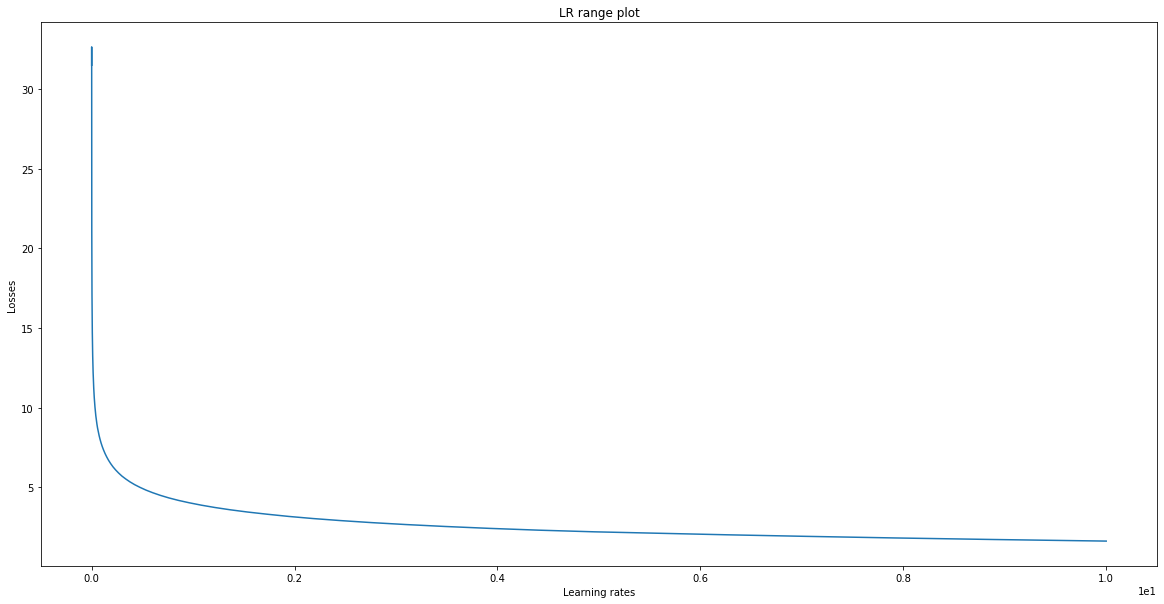

In [208]:
plt.figure(figsize=(20, 10))
plt.plot(score["lr_arr"], score["lr_losses"])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('LR range plot')
plt.xlabel('Learning rates')
plt.ylabel('Losses')
plt.show()

In [209]:
def plot_dist_wise_acc(split):
    fig = plt.figure(figsize=(20,10))
    fig.suptitle('Accuracy and Distance Count - {}'.format(split))
    ax = plt.subplot(2,1,1)
    plt.title('distance-wise accuracy')
    plt.xlabel('distance values')
    plt.ylabel('accuracy')
    width = 0.95
    n_emb_dims = len(list(scores["fb-pages-food"].keys()))
    for i, (emb_dim, split_dict) in enumerate(scores["fb-pages-food"].items()):
        dist_accuracies = split_dict[split]["nn"]["dist_accuracies"]
        
        bar_offset = width/2 - width/n_emb_dims * i
        plt.bar(np.array(range(len(dist_accuracies))) - bar_offset, dist_accuracies, width/n_emb_dims, label="{}".format(emb_dim))
        """
        for index, value in enumerate(dist_accuracies):
            plt.text(index+0.03, value, str(np.round(value, 2))+'%')
        """
    plt.legend()
    ax.set_xticks(range(len(dist_accuracies)))
    
    dist_counts = scores["fb-pages-food"][16][split]["nn"]["dist_counts"]
    ax = plt.subplot(2,1,2)
    ax.set_xticks(range(len(dist_counts)))
    plt.bar(range(len(dist_counts)), dist_counts, label="{}".format(emb_dim))
    for index, value in enumerate(dist_counts):
        plt.text(index+0.03, value, str(value))
    plt.title('distance-wise count')
    plt.xlabel('distance values')
    plt.ylabel('counts')
    fig.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

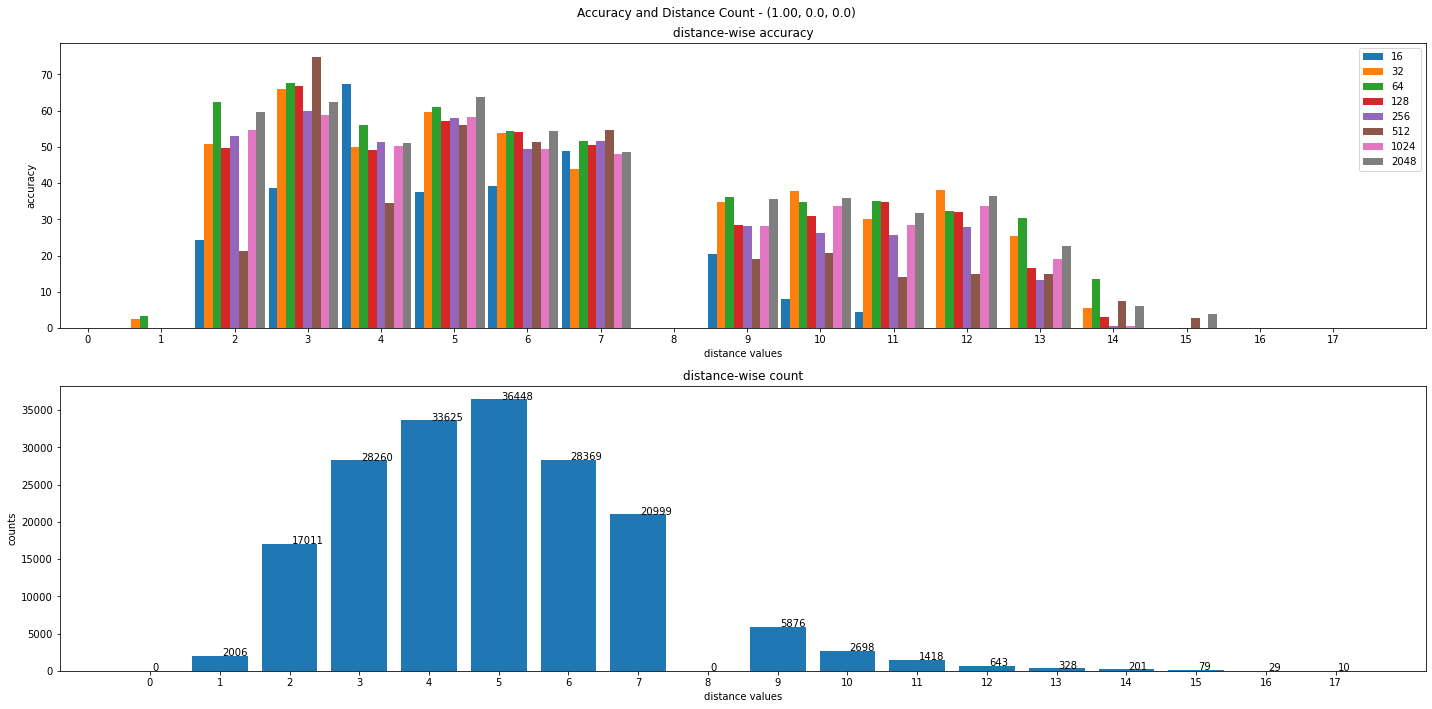

In [210]:
plot_dist_wise_acc("(1.00, 0.0, 0.0)")

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

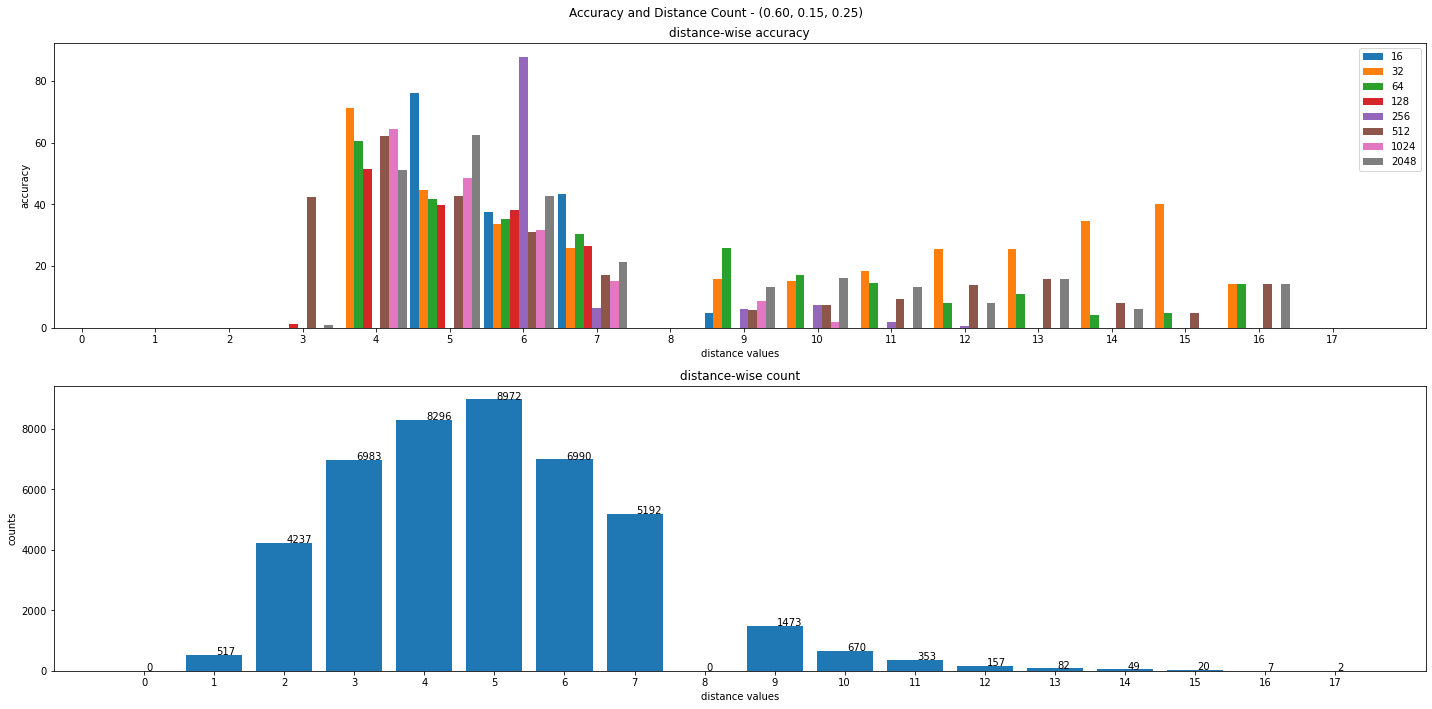

In [211]:
plot_dist_wise_acc("(0.60, 0.15, 0.25)")

In [212]:
def plot_emb_dim_accs(split):
    emb_dims = []
    emb_dims_accs = []
    emb_dims_accs_baseline = []
    for emb_dim, split_dict in scores["fb-pages-food"].items():
        score_dict = split_dict[split]
        emb_dims.append(str(emb_dim))
        emb_dims_accs.append(score_dict["nn"]["acc"])
        emb_dims_accs_baseline.append(score_dict["baseline"]["acc"]/100)

    plt.figure(figsize=(20, 10))
    plt.title('Embedding Dimension vs. Accuracy - {}'.format(split))
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Accuracy')
    plt.plot(emb_dims, emb_dims_accs_baseline, label="linear regression")
    plt.plot(emb_dims, emb_dims_accs, label="neural net")
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

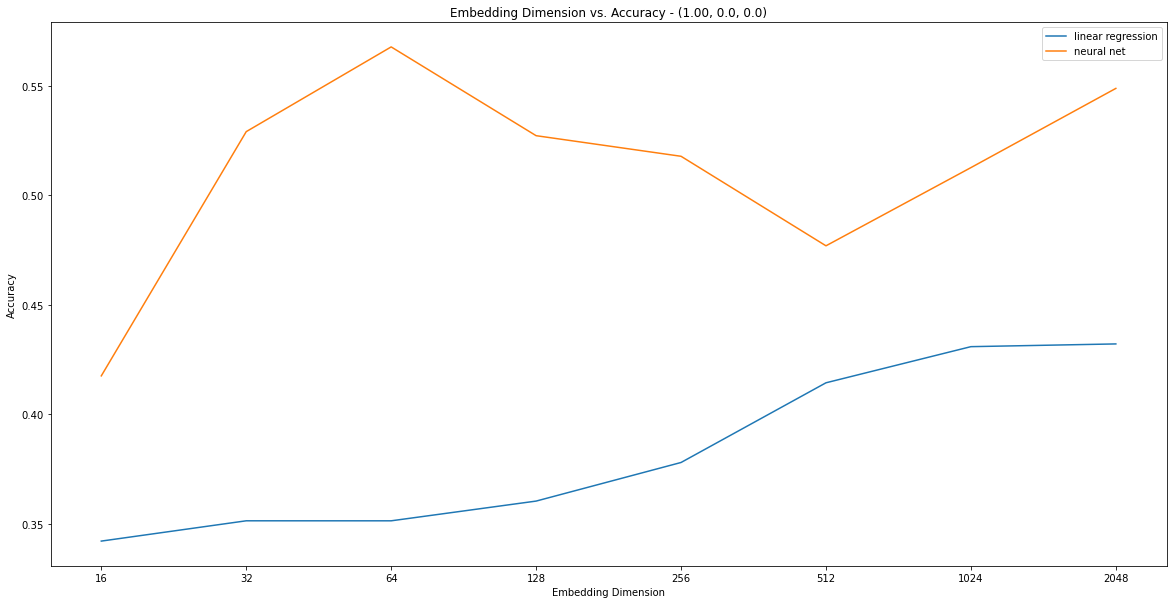

In [213]:
plot_emb_dim_accs("(1.00, 0.0, 0.0)")

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

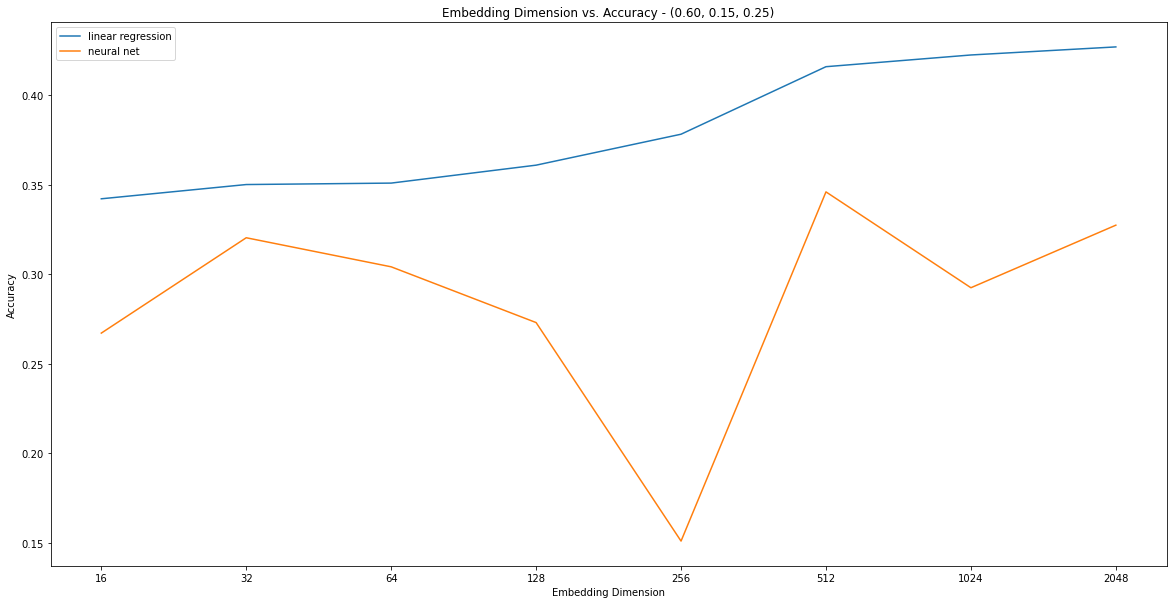

In [214]:
plot_emb_dim_accs("(0.60, 0.15, 0.25)")

In [215]:
def plot_losses(split, emb_dim_exception_list=[]):
    plt.figure(figsize=(20, 20))
    plt.title('Training Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    for emb_dim, split_dict in scores["fb-pages-food"].items():
        if emb_dim in emb_dim_exception_list:
            continue
        train_losses = split_dict[split]["nn"]["train_losses"]
        val_losses = split_dict[split]["nn"]["val_losses"]
        plt.plot(range(1, len(train_losses)+1), train_losses, label="train - emb {}".format(emb_dim))
        plt.plot(range(1, len(val_losses)+1), val_losses, label="val - emb {}".format(emb_dim))
    labelLines(plt.gca().get_lines(), align=False, fontsize=14)
    return plt

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

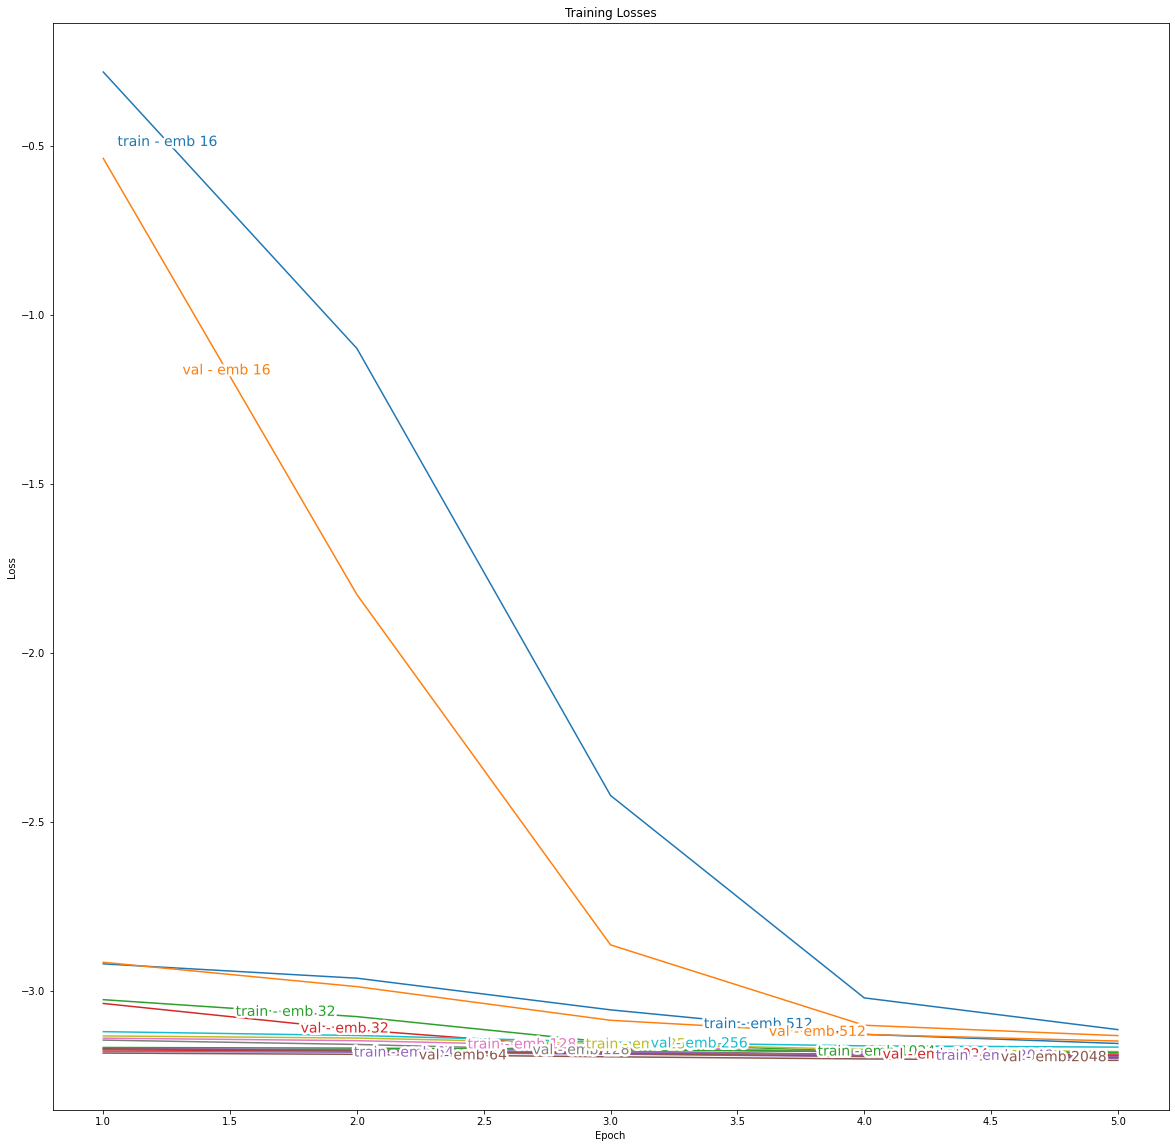

In [216]:
plot_losses("(1.00, 0.0, 0.0)", emb_dim_exception_list=[])

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

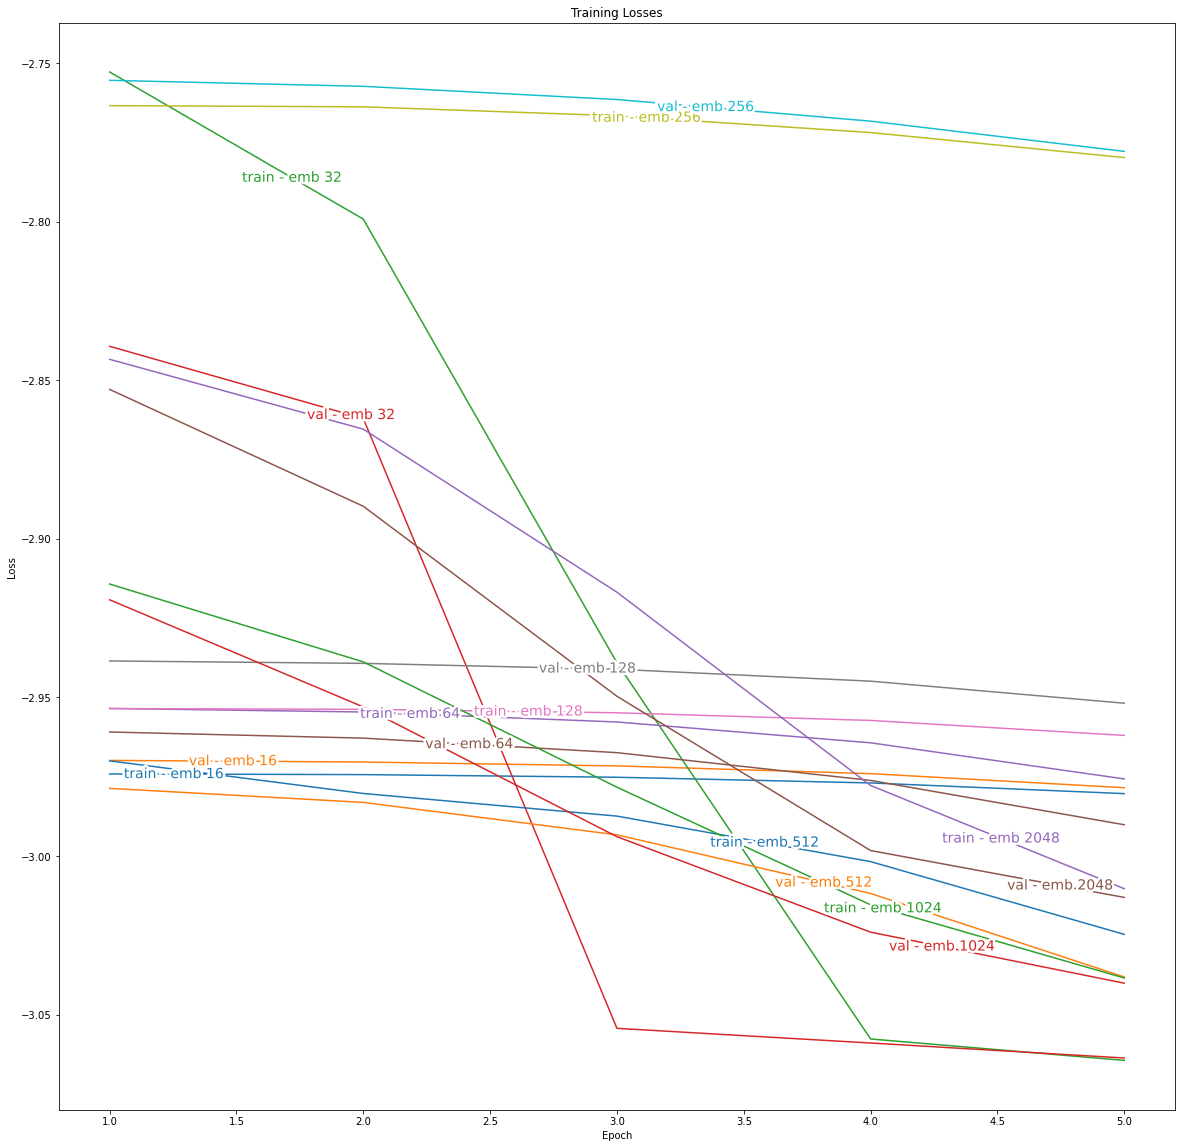

In [217]:
plot_losses("(0.60, 0.15, 0.25)")